In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.loc['revol_util']['Description']

'Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.'

In [4]:
def feat_desc(name):
    return data_info.loc[name]['Description']

In [5]:
feat_desc('mort_acc')

'Number of mortgage accounts.'

## Import Data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [7]:
data = pd.read_csv('lending_club_loan_two.csv')
untouched = pd.read_csv('lending_club_loan_two.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Loan Status count plot

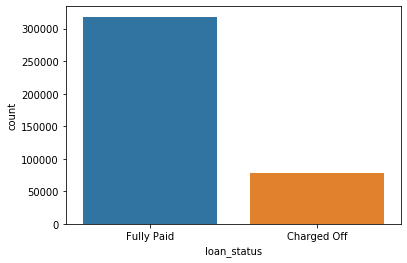

In [9]:
sb.countplot(x='loan_status',data=data)

## Histogram for loan Amount

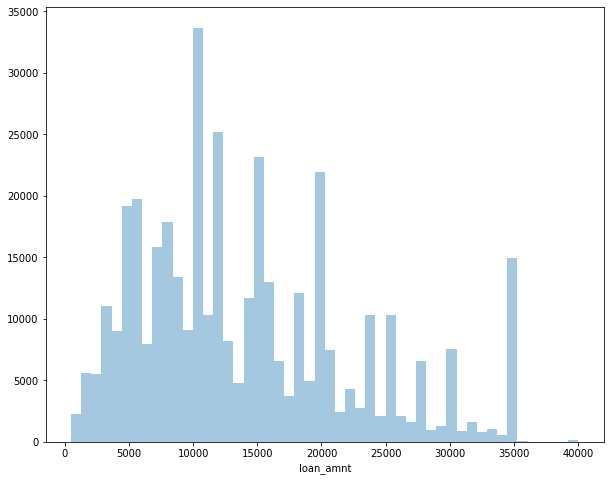

In [10]:
plt.figure(figsize=(10,8))
sb.distplot(data['loan_amnt'],kde=False)

## Correlation of data

In [11]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


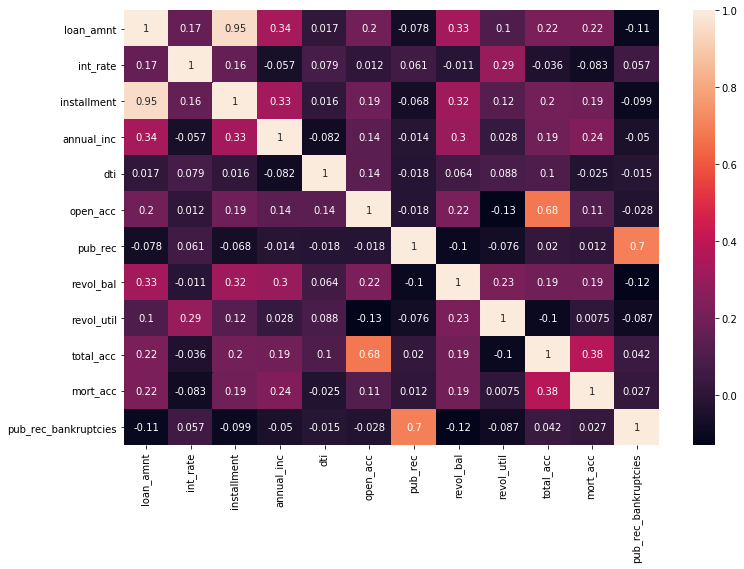

In [12]:
plt.figure(figsize=(12,8))
sb.heatmap(data.corr(),annot=True)

## From above heat map, we found installment has highest correlation wth loan amount

In [13]:
print(feat_desc('installment'))

The monthly payment owed by the borrower if the loan originates.


In [14]:
print(feat_desc('loan_amnt'))

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


## Scatter plot between installment and loan amount

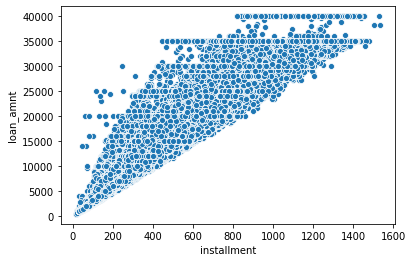

In [15]:
sb.scatterplot(x='installment',y='loan_amnt',data=data)

## BoxPlot between loan amount and loan status

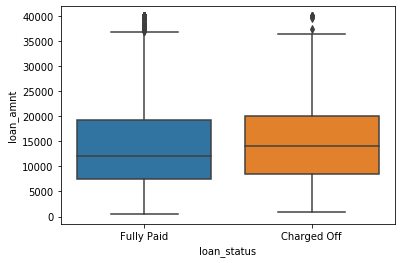

In [16]:
sb.boxplot(x='loan_status',y='loan_amnt',data=data)

In [17]:
data.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [19]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

## countplot per grade , hue=loan_status

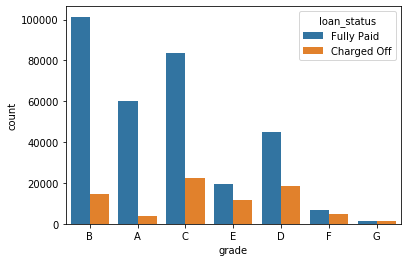

In [20]:
sb.countplot(x='grade',hue='loan_status',data=data)

## count plot for subgrade

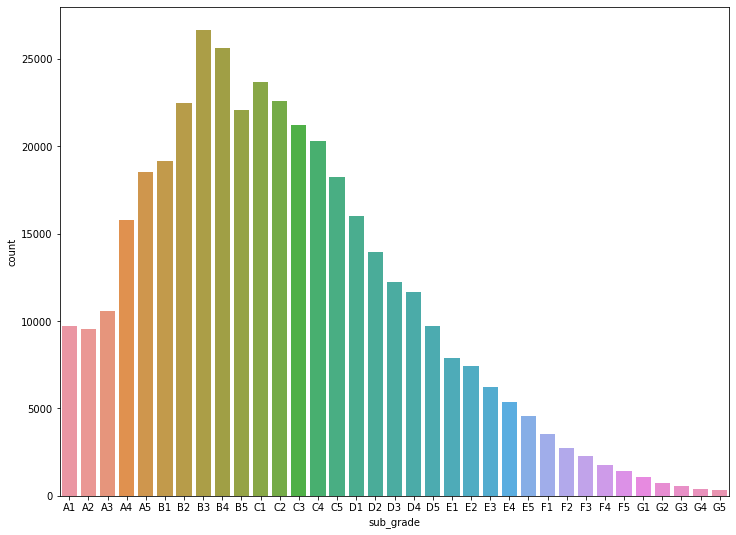

In [21]:
plt.figure(figsize=(12,9))
sb.countplot(data['sub_grade'].sort_values())

## Countplot for sub-grade ,hue=loan_status

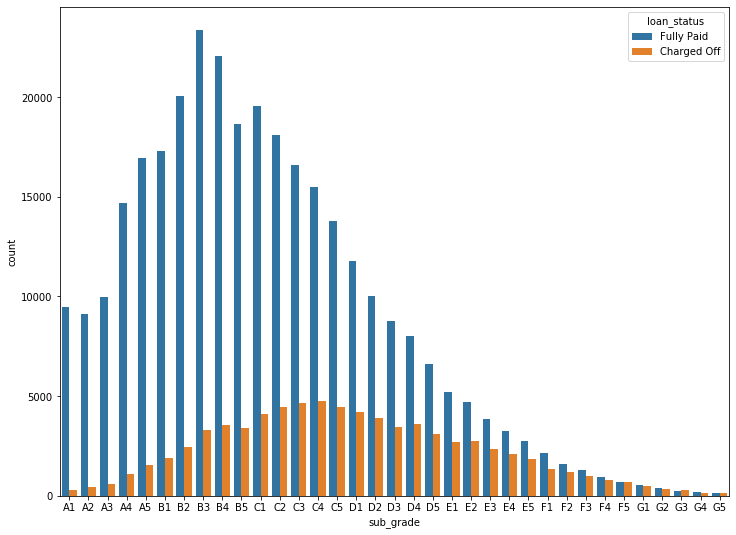

In [22]:
plt.figure(figsize=(12,9))
sb.countplot(data['sub_grade'].sort_values(),hue=data['loan_status'])

## Isolate F and G grades

In [23]:
f_and_g_subgrade = data[(data['grade']=='F') | (data['grade']=='G')]['sub_grade'].sort_values()

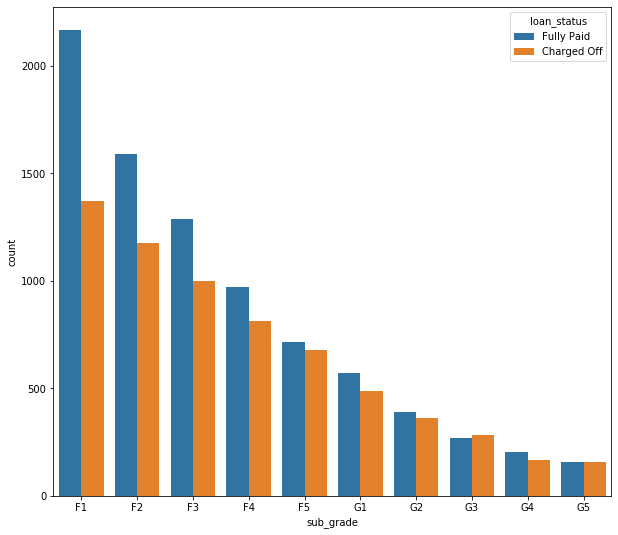

In [24]:
plt.figure(figsize=(10,9))
sb.countplot(f_and_g_subgrade,hue=data['loan_status'])

In [188]:
data['loan_repaid'] = data['loan_status'].apply(lambda l: 0 if l == 'Charged Off' else 1)

In [26]:
data[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


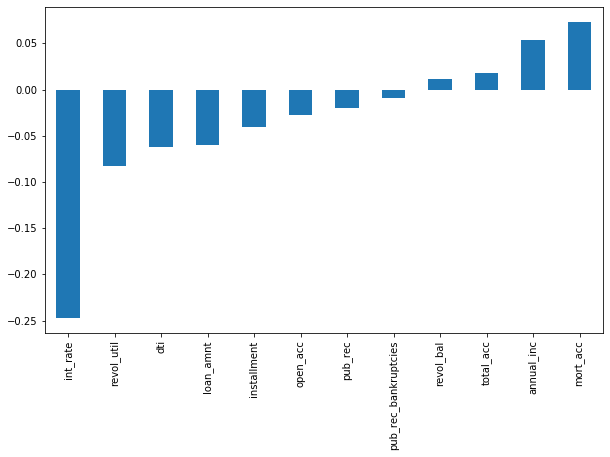

In [27]:
plt.figure(figsize=(10,6))
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [28]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

## Data Preprocessing

In [29]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [30]:
data.isna().mean().apply(lambda a: a*100)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [31]:
print(feat_desc('emp_title'))

The job title supplied by the Borrower when applying for the loan.*


In [32]:
print(feat_desc('emp_length'))

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [33]:
data['emp_title'].nunique()

173105

In [34]:
data = data.drop('emp_title',axis=1)

In [35]:
data['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

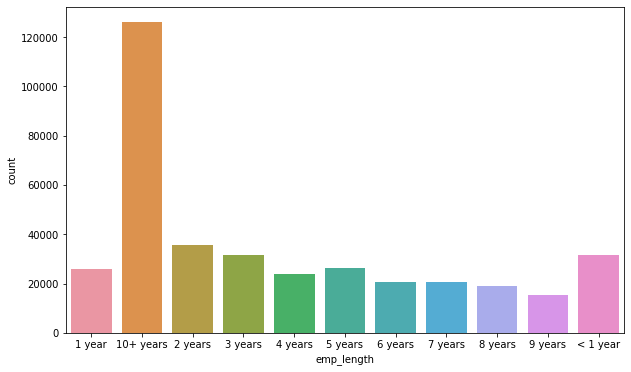

In [36]:
plt.figure(figsize=(10,6))
sb.countplot(data['emp_length'].sort_values())

In [37]:
emp_co = data[data['loan_status']=='Charged Off'].groupby('emp_length')['loan_amnt'].count()
emp_fp = data[data['loan_status']=='Fully Paid'].groupby('emp_length')['loan_amnt'].count()

In [38]:
ratio = emp_co/emp_fp

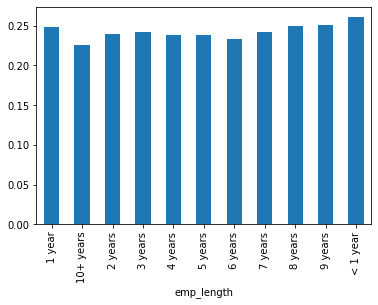

In [39]:
ratio.plot(kind='bar')

## Charge off rates are extremely similar across all employment lengths. Dropping the emp_length column.

In [40]:
data= data.drop('emp_length',axis=1)

In [41]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
data[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [43]:
data = data.drop('title',axis=1)

In [44]:
print(feat_desc('mort_acc'))

Number of mortgage accounts.


In [45]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [46]:
data.corr().loc['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [47]:
mean_mort_df=data.groupby('total_acc').mean()['mort_acc']

In [48]:
def get_mort_acc(cols):
    t = cols[0]
    m = cols[1]
    if not pd.isna(m):
        return m
    else:
        return mean_mort_df[t]

## Taking mean value of mortage account based on total_account to fill missing values

In [49]:
data['mort_acc'] = data[['total_acc','mort_acc']].apply(get_mort_acc,axis=1)

In [50]:
data[data['mort_acc'].isna()]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid


In [51]:
data.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [52]:
data = data.dropna()

In [53]:
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [54]:
data.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [55]:
data['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [56]:
data['term'][0].strip().split()[0]

'36'

In [66]:
data['term'] = data['term'].apply(lambda d: int(d.strip().split()[0]))

In [67]:
data['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [59]:
data=data.drop('grade',axis=1)

In [60]:
data.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [61]:
data = pd.get_dummies(data=data,columns=['sub_grade'],drop_first=True)

In [62]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

In [63]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [68]:
data.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [70]:
data['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [71]:
data['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [72]:
data['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [73]:
data['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

## Insert Dummy values for below columns as this is categorical

In [74]:
data = pd.get_dummies(data=data,columns=['verification_status','application_type','initial_list_status','purpose'],drop_first=True)

In [75]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL'

In [76]:
data.select_dtypes(include='object').columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [77]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [78]:
data['home_ownership'] = data['home_ownership'].apply(lambda h: 'OTHER' if h == 'NONE' or h == 'ANY' else h)

In [79]:
data['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [80]:
data= pd.get_dummies(data=data,columns=['home_ownership'],drop_first=True)

In [81]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'applicat

In [86]:
data['address'][0].split()[-1]

'22690'

In [89]:
data['zip_code']=data['address'].apply(lambda a: a.split()[-1] )

In [92]:
data['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [94]:
data = pd.get_dummies(data,columns=['zip_code'],drop_first=True)

In [95]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'applicat

In [97]:
data=data.drop(['issue_d','earliest_cr_line'],axis=1)

In [98]:
data.select_dtypes(include='object').columns

Index(['loan_status', 'address'], dtype='object')

In [180]:
data['earliest_cr_year'] = untouched['earliest_cr_line'].apply(lambda c: int(c.split('-')[1]))


In [187]:
from sklearn.model_selection import train_test_split
data=data.drop('loan_status',axis=1)

In [189]:
X=data.drop('loan_repaid',axis=1).values
y=data['loan_repaid'].values


In [182]:
len(data)
data.shape

(395219, 79)

## Preparing test and train data after data has been pre processed

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [194]:
from sklearn.preprocessing import MinMaxScaler

## Scaling train and test data

In [195]:
scaler = MinMaxScaler()

In [196]:
X_train = scaler.fit_transform(X_train)

In [197]:
X_test = scaler.transform(X_test)

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [199]:
model = Sequential()

In [200]:
X_train.shape

(316175, 78)

## Insert Neural networks and adding dropout to drop 50% network for each iteration

In [201]:
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [202]:
model.fit(X_train,y_train,batch_size=256,epochs=25,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.3433 - val_loss: 0.2676
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2761 - val_loss: 0.2661
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2693 - val_loss: 0.2650
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2672 - val_loss: 0.2641
Epoch 5/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2658 - val_loss: 0.2633
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2651 - val_loss: 0.2643
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2648 - val_loss: 0.2641
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2644 - val_loss: 0.2642
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2642 - val_loss: 0.2644
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.263

In [123]:
from tensorflow.keras.models import load_model

## Saving the model

In [203]:
model.save('saved_model.h5')

In [204]:
loss_data = pd.DataFrame(model.history.history)

## plotting loss data to check for overfitting with train data

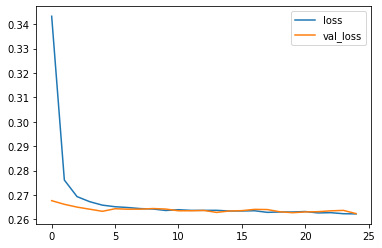

In [205]:
loss_data.plot()

In [206]:
y_predict = model.predict_classes(X_test)

In [207]:
from sklearn.metrics import classification_report,confusion_matrix

## Printing Metrics

In [208]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [209]:
print(confusion_matrix(y_test,y_predict))

[[ 6721  8937]
 [    1 63385]]


## Validating model with new customer sample data

In [210]:
import random
random.seed(101)
random_ind = random.randint(0,len(data))
print(random_ind)

new_customer = data.drop('loan_repaid',axis=1).iloc[1]
loan_repaid = data['loan_repaid'].iloc[1]
new_customer

304691


loan_amnt            8000.00
term                   36.00
int_rate               11.99
installment           265.68
annual_inc          65000.00
                      ...   
zip_code_48052          0.00
zip_code_70466          0.00
zip_code_86630          0.00
zip_code_93700          0.00
earliest_cr_year     2004.00
Name: 1, Length: 78, dtype: float64

In [212]:
new_customer = scaler.transform(new_customer.values.reshape(-1,78))

In [213]:
prediction = model.predict_classes(new_customer)

## Checking prediction and original Value

In [214]:
prediction

array([[1]], dtype=int32)

In [215]:
loan_repaid

1

### Model correctly predicted whether the new customer will repay loan